# Logistic Regression with SUSY
Today, you'll be a physicist, working with collider data to make new particle discoveries! You've been given a small subset of the SUSY Data Set, which contains the results of a simulated experiment to detect supersymmetric particles.

First, let's start off with the necessary imports.

In [1]:
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Next, we will read in the data and split into training and validation sets.

In [2]:
with open("SUSY_small.csv", "r") as f:
    read = csv.reader(f, delimiter=",")
    x = list(read)
data = np.array([[float(x[i][j]) for j in range(len(x[0]))] for i in range(len(x))])

In [3]:
shuffle = np.arange(data.shape[0])
np.random.shuffle(shuffle)
data_train = data[shuffle[:-1000],:]
data_val = data[shuffle[-1000:],:]
X_train, Y_train = data_train[:,1:], data_train[:,0]
X_val, Y_val = data_val[:,1:], data_val[:,0]

print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(4112, 18) (1000, 18) (4112,) (1000,)


Let's now implement the functions needed to perform gradient descent.

In [5]:
def sigmoid(X, w):
    """
    Compute the elementwise sigmoid of the product Xw
    Data in X should be rows, weights are a column. 
    """
    return 1 / (1 + np.exp(-np.dot(X,w)))

def gradient(X, y, w, onept=False, norm=None, lamb=0):
    """
    Compute gradient of regularized loss function. 
    Accomodate for if X is just one data point. 
    """
    grad = 0
    if norm == 'l1':
        grad += lamb * np.sign(w)
    elif norm == 'l2':
        grad += 2 * lamb * w
    if onept:
        grad += -((y - sigmoid(X, w)) * X).reshape(w.size, 1)
    else :
        grad += -np.dot(X.T, y - sigmoid(X,w)) / y.size
    return grad

def loss(X, y, w, norm=None, lamb=0):
    """
    Compute total loss for the data in X, labels in y, params w
    """
    sumcost = 0
    for i in range(X.shape[0]):
        sumcost += y[i] * np.log(sigmoid(X[i], w)) + (1 - y[i]) * np.log(1-sigmoid(X[i],w))
    normcost = 0
    if norm == 'l1':
        normcost = lamb * np.sum(np.abs(w))
    elif norm == 'l2':
        normcost = lamb * np.linalign.norm(w)**2
    return normcost - sumcost / y.size

def accuracy(X, y, w):
    """
    Compute accuracy for data in X, labels in y, params w
    """
    results = np.round(sigmoid(X,w))
    score = sum([results[i] == y[i] for i in range(y.size)]) / y.size
    return score

Now that we have the needed functions, we can perform gradient descent to train the model.

In [6]:
theta = np.random.normal(0, 0.1, X_train.shape[1])
losses = []
train_accuracies = []
validation_accuracies = []
epsilon = 0.05
num_iterations = 300

for i in range(num_iterations):
    diff = epsilon * gradient(X_train, Y_train, theta)
    theta -= diff
    losses.append(loss(X_train, Y_train, theta))
    train_accuracies.append(accuracy(X_train, Y_train, theta))
    validation_accuracies.append(accuracy(X_val, Y_val, theta))

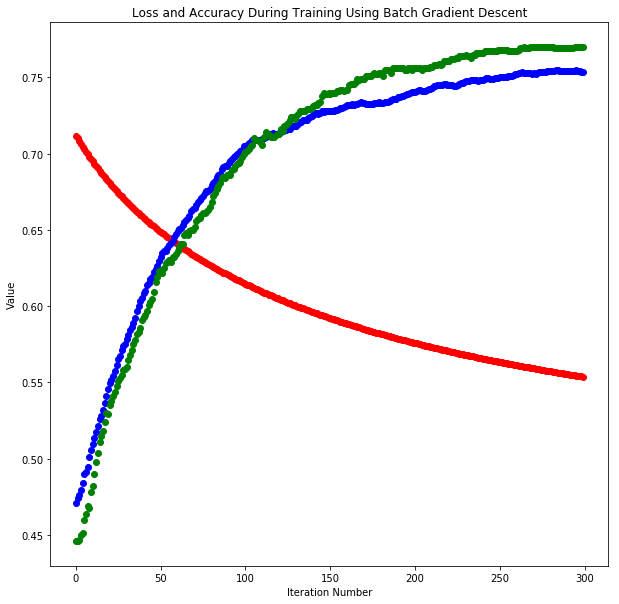

0.753647859922179


In [7]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), train_accuracies, 'bo')
plt.plot(np.arange(num_iterations), validation_accuracies, 'go')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(X_train, Y_train, theta))

In [8]:
print(accuracy(X_val, Y_val, theta))

0.77


# Logistic Regression with Regularization
What happens when our model overfits? Let's see what we can do to improve our validation accuracy.

In [9]:
X_train_small, Y_train_small = data_train[:50,1:], data_train[:50,0]

In [15]:
theta = np.random.normal(0, 0.1, X_train_small.shape[1])
losses = []
train_accuracies = []
validation_accuracies = []
epsilon = 0.05
num_iterations = 500
norms = ['l1', 'l2']
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]

for norm in norms:
    print(norm)
    for lamb in lambdas:
        theta = np.random.normal(0, 0.1, X_train_small.shape[1])
        for i in range(num_iterations):
            diff = epsilon * gradient(X_train_small, Y_train_small, theta, norm = norm, lamb= lamb)
            theta -= diff
            losses.append(loss(X_train, Y_train, theta))
            train_accuracies.append(accuracy(X_train, Y_train, theta))
            validation_accuracies.append(accuracy(X_val, Y_val, theta))
            print(lamb)
            print('Training: ' + str(train_accuracies[i]) + ", Validation: " + str(validation_accuracies[i]))

l1
0
Training: 0.5041342412451362, Validation: 0.505
0
Training: 0.5104571984435797, Validation: 0.517
0
Training: 0.5165369649805448, Validation: 0.524
0
Training: 0.5252918287937743, Validation: 0.534
0
Training: 0.5296692607003891, Validation: 0.545
0
Training: 0.5376945525291829, Validation: 0.548
0
Training: 0.5415856031128404, Validation: 0.551
0
Training: 0.5505836575875487, Validation: 0.558
0
Training: 0.5617704280155642, Validation: 0.564
0
Training: 0.566147859922179, Validation: 0.57
0
Training: 0.5729571984435797, Validation: 0.585
0
Training: 0.5785505836575876, Validation: 0.588
0
Training: 0.5846303501945526, Validation: 0.592
0
Training: 0.5887645914396887, Validation: 0.592
0
Training: 0.5875486381322957, Validation: 0.596
0
Training: 0.5933852140077821, Validation: 0.599
0
Training: 0.5965466926070039, Validation: 0.603
0
Training: 0.5999513618677043, Validation: 0.604
0
Training: 0.6016536964980544, Validation: 0.604
0
Training: 0.6033560311284046, Validation: 0.599

0
Training: 0.6629377431906615, Validation: 0.686
0
Training: 0.6634241245136187, Validation: 0.686
0
Training: 0.6634241245136187, Validation: 0.686
0
Training: 0.6639105058365758, Validation: 0.686
0
Training: 0.6639105058365758, Validation: 0.686
0
Training: 0.664396887159533, Validation: 0.686
0
Training: 0.664396887159533, Validation: 0.686
0
Training: 0.6648832684824902, Validation: 0.686
0
Training: 0.6651264591439688, Validation: 0.687
0
Training: 0.6648832684824902, Validation: 0.687
0
Training: 0.6648832684824902, Validation: 0.687
0
Training: 0.6648832684824902, Validation: 0.686
0
Training: 0.6651264591439688, Validation: 0.686
0
Training: 0.6653696498054474, Validation: 0.686
0
Training: 0.6651264591439688, Validation: 0.685
0
Training: 0.665612840466926, Validation: 0.685
0
Training: 0.665612840466926, Validation: 0.685
0
Training: 0.665612840466926, Validation: 0.685
0
Training: 0.665612840466926, Validation: 0.685
0
Training: 0.6651264591439688, Validation: 0.685
0
Trai

0
Training: 0.6875, Validation: 0.698
0
Training: 0.6875, Validation: 0.699
0
Training: 0.6875, Validation: 0.699
0
Training: 0.6877431906614786, Validation: 0.699
0
Training: 0.6879863813229572, Validation: 0.699
0
Training: 0.6882295719844358, Validation: 0.699
0
Training: 0.6882295719844358, Validation: 0.7
0
Training: 0.6882295719844358, Validation: 0.701
0
Training: 0.6884727626459144, Validation: 0.701
0
Training: 0.688715953307393, Validation: 0.701
0
Training: 0.688715953307393, Validation: 0.701
0
Training: 0.688715953307393, Validation: 0.701
0
Training: 0.6884727626459144, Validation: 0.701
0
Training: 0.6884727626459144, Validation: 0.701
0
Training: 0.6889591439688716, Validation: 0.701
0
Training: 0.6889591439688716, Validation: 0.702
0
Training: 0.6889591439688716, Validation: 0.702
0
Training: 0.6884727626459144, Validation: 0.703
0
Training: 0.6884727626459144, Validation: 0.703
0
Training: 0.6882295719844358, Validation: 0.704
0
Training: 0.6884727626459144, Validatio

0.001
Training: 0.5617704280155642, Validation: 0.564
0.001
Training: 0.566147859922179, Validation: 0.57
0.001
Training: 0.5729571984435797, Validation: 0.585
0.001
Training: 0.5785505836575876, Validation: 0.588
0.001
Training: 0.5846303501945526, Validation: 0.592
0.001
Training: 0.5887645914396887, Validation: 0.592
0.001
Training: 0.5875486381322957, Validation: 0.596
0.001
Training: 0.5933852140077821, Validation: 0.599
0.001
Training: 0.5965466926070039, Validation: 0.603
0.001
Training: 0.5999513618677043, Validation: 0.604
0.001
Training: 0.6016536964980544, Validation: 0.604
0.001
Training: 0.6033560311284046, Validation: 0.599
0.001
Training: 0.6065175097276264, Validation: 0.605
0.001
Training: 0.6089494163424124, Validation: 0.604
0.001
Training: 0.6116245136186771, Validation: 0.608
0.001
Training: 0.6106517509727627, Validation: 0.607
0.001
Training: 0.6116245136186771, Validation: 0.61
0.001
Training: 0.6130836575875487, Validation: 0.612
0.001
Training: 0.6150291828793

0.001
Training: 0.6614785992217899, Validation: 0.681
0.001
Training: 0.6617217898832685, Validation: 0.683
0.001
Training: 0.6622081712062257, Validation: 0.684
0.001
Training: 0.6624513618677043, Validation: 0.686
0.001
Training: 0.6626945525291829, Validation: 0.686
0.001
Training: 0.6629377431906615, Validation: 0.685
0.001
Training: 0.66318093385214, Validation: 0.685
0.001
Training: 0.6629377431906615, Validation: 0.686
0.001
Training: 0.6634241245136187, Validation: 0.686
0.001
Training: 0.6634241245136187, Validation: 0.686
0.001
Training: 0.6639105058365758, Validation: 0.686
0.001
Training: 0.6639105058365758, Validation: 0.686
0.001
Training: 0.664396887159533, Validation: 0.686
0.001
Training: 0.664396887159533, Validation: 0.686
0.001
Training: 0.6648832684824902, Validation: 0.686
0.001
Training: 0.6651264591439688, Validation: 0.687
0.001
Training: 0.6648832684824902, Validation: 0.687
0.001
Training: 0.6648832684824902, Validation: 0.687
0.001
Training: 0.66488326848249

0.001
Training: 0.685068093385214, Validation: 0.699
0.001
Training: 0.6853112840466926, Validation: 0.699
0.001
Training: 0.6853112840466926, Validation: 0.699
0.001
Training: 0.6857976653696498, Validation: 0.699
0.001
Training: 0.6860408560311284, Validation: 0.699
0.001
Training: 0.686284046692607, Validation: 0.7
0.001
Training: 0.6865272373540856, Validation: 0.699
0.001
Training: 0.6865272373540856, Validation: 0.699
0.001
Training: 0.686284046692607, Validation: 0.699
0.001
Training: 0.6865272373540856, Validation: 0.699
0.001
Training: 0.6865272373540856, Validation: 0.699
0.001
Training: 0.686284046692607, Validation: 0.698
0.001
Training: 0.6867704280155642, Validation: 0.698
0.001
Training: 0.6872568093385214, Validation: 0.698
0.001
Training: 0.6872568093385214, Validation: 0.698
0.001
Training: 0.6870136186770428, Validation: 0.698
0.001
Training: 0.6872568093385214, Validation: 0.698
0.001
Training: 0.6875, Validation: 0.698
0.001
Training: 0.6875, Validation: 0.698
0.00

0.001
Training: 0.6984435797665369, Validation: 0.715
0.001
Training: 0.6982003891050583, Validation: 0.715
0.001
Training: 0.6986867704280155, Validation: 0.715
0.001
Training: 0.6989299610894941, Validation: 0.715
0.001
Training: 0.6989299610894941, Validation: 0.715
0.001
Training: 0.6989299610894941, Validation: 0.714
0.001
Training: 0.6989299610894941, Validation: 0.714
0.001
Training: 0.6989299610894941, Validation: 0.714
0.001
Training: 0.6989299610894941, Validation: 0.715
0.001
Training: 0.6991731517509727, Validation: 0.715
0.001
Training: 0.6991731517509727, Validation: 0.715
0.001
Training: 0.6989299610894941, Validation: 0.715
0.001
Training: 0.6989299610894941, Validation: 0.715
0.001
Training: 0.6994163424124513, Validation: 0.715
0.001
Training: 0.6994163424124513, Validation: 0.715
0.001
Training: 0.6994163424124513, Validation: 0.715
0.001
Training: 0.6994163424124513, Validation: 0.715
0.001
Training: 0.6994163424124513, Validation: 0.715
0.001
Training: 0.6994163424

0.01
Training: 0.6571011673151751, Validation: 0.675
0.01
Training: 0.6571011673151751, Validation: 0.675
0.01
Training: 0.6571011673151751, Validation: 0.675
0.01
Training: 0.6571011673151751, Validation: 0.675
0.01
Training: 0.6568579766536965, Validation: 0.675
0.01
Training: 0.6573443579766537, Validation: 0.676
0.01
Training: 0.6575875486381323, Validation: 0.678
0.01
Training: 0.6578307392996109, Validation: 0.678
0.01
Training: 0.6585603112840467, Validation: 0.678
0.01
Training: 0.6585603112840467, Validation: 0.677
0.01
Training: 0.6588035019455253, Validation: 0.677
0.01
Training: 0.6588035019455253, Validation: 0.677
0.01
Training: 0.6585603112840467, Validation: 0.677
0.01
Training: 0.6583171206225681, Validation: 0.677
0.01
Training: 0.6585603112840467, Validation: 0.68
0.01
Training: 0.6585603112840467, Validation: 0.68
0.01
Training: 0.6585603112840467, Validation: 0.68
0.01
Training: 0.6588035019455253, Validation: 0.681
0.01
Training: 0.6590466926070039, Validation: 0.

0.01
Training: 0.6843385214007782, Validation: 0.701
0.01
Training: 0.6843385214007782, Validation: 0.701
0.01
Training: 0.6843385214007782, Validation: 0.7
0.01
Training: 0.6843385214007782, Validation: 0.7
0.01
Training: 0.6843385214007782, Validation: 0.699
0.01
Training: 0.6843385214007782, Validation: 0.699
0.01
Training: 0.6843385214007782, Validation: 0.699
0.01
Training: 0.6845817120622568, Validation: 0.699
0.01
Training: 0.6845817120622568, Validation: 0.699
0.01
Training: 0.6848249027237354, Validation: 0.7
0.01
Training: 0.6845817120622568, Validation: 0.7
0.01
Training: 0.6843385214007782, Validation: 0.7
0.01
Training: 0.6845817120622568, Validation: 0.7
0.01
Training: 0.6843385214007782, Validation: 0.7
0.01
Training: 0.685068093385214, Validation: 0.7
0.01
Training: 0.685068093385214, Validation: 0.701
0.01
Training: 0.685068093385214, Validation: 0.701
0.01
Training: 0.6853112840466926, Validation: 0.701
0.01
Training: 0.6853112840466926, Validation: 0.701
0.01
Trainin

0.01
Training: 0.6977140077821011, Validation: 0.711
0.01
Training: 0.6977140077821011, Validation: 0.711
0.01
Training: 0.6979571984435797, Validation: 0.711
0.01
Training: 0.6979571984435797, Validation: 0.711
0.01
Training: 0.6979571984435797, Validation: 0.712
0.01
Training: 0.6979571984435797, Validation: 0.712
0.01
Training: 0.6979571984435797, Validation: 0.712
0.01
Training: 0.6979571984435797, Validation: 0.712
0.01
Training: 0.6979571984435797, Validation: 0.712
0.01
Training: 0.6979571984435797, Validation: 0.712
0.01
Training: 0.6979571984435797, Validation: 0.713
0.01
Training: 0.6979571984435797, Validation: 0.714
0.01
Training: 0.6979571984435797, Validation: 0.714
0.01
Training: 0.6979571984435797, Validation: 0.714
0.01
Training: 0.6979571984435797, Validation: 0.714
0.01
Training: 0.6979571984435797, Validation: 0.714
0.01
Training: 0.6979571984435797, Validation: 0.714
0.01
Training: 0.6979571984435797, Validation: 0.714
0.01
Training: 0.6979571984435797, Validation:

0.1
Training: 0.6524805447470817, Validation: 0.675
0.1
Training: 0.6527237354085603, Validation: 0.675
0.1
Training: 0.6534533073929961, Validation: 0.676
0.1
Training: 0.6541828793774319, Validation: 0.676
0.1
Training: 0.6544260700389105, Validation: 0.675
0.1
Training: 0.6544260700389105, Validation: 0.676
0.1
Training: 0.6546692607003891, Validation: 0.676
0.1
Training: 0.6549124513618677, Validation: 0.676
0.1
Training: 0.6544260700389105, Validation: 0.676
0.1
Training: 0.6544260700389105, Validation: 0.676
0.1
Training: 0.6541828793774319, Validation: 0.675
0.1
Training: 0.6551556420233463, Validation: 0.674
0.1
Training: 0.6556420233463035, Validation: 0.674
0.1
Training: 0.6556420233463035, Validation: 0.674
0.1
Training: 0.6561284046692607, Validation: 0.674
0.1
Training: 0.6568579766536965, Validation: 0.675
0.1
Training: 0.6573443579766537, Validation: 0.675
0.1
Training: 0.6573443579766537, Validation: 0.675
0.1
Training: 0.6571011673151751, Validation: 0.675
0.1
Training

0.1
Training: 0.682636186770428, Validation: 0.699
0.1
Training: 0.6828793774319066, Validation: 0.699
0.1
Training: 0.6831225680933852, Validation: 0.7
0.1
Training: 0.6831225680933852, Validation: 0.701
0.1
Training: 0.6833657587548638, Validation: 0.702
0.1
Training: 0.6833657587548638, Validation: 0.702
0.1
Training: 0.6833657587548638, Validation: 0.702
0.1
Training: 0.6833657587548638, Validation: 0.702
0.1
Training: 0.6833657587548638, Validation: 0.702
0.1
Training: 0.6836089494163424, Validation: 0.702
0.1
Training: 0.6836089494163424, Validation: 0.702
0.1
Training: 0.683852140077821, Validation: 0.702
0.1
Training: 0.6840953307392996, Validation: 0.702
0.1
Training: 0.6843385214007782, Validation: 0.702
0.1
Training: 0.6843385214007782, Validation: 0.702
0.1
Training: 0.6843385214007782, Validation: 0.702
0.1
Training: 0.6843385214007782, Validation: 0.701
0.1
Training: 0.6843385214007782, Validation: 0.701
0.1
Training: 0.6843385214007782, Validation: 0.7
0.1
Training: 0.68

0.1
Training: 0.6972276264591439, Validation: 0.711
0.1
Training: 0.6972276264591439, Validation: 0.711
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.71
0.1
Training: 0.6974708171206225, Validation: 0.711
0.1
Training: 0.6974708171206225, Validation: 0.711
0.1
Training: 0.6977140077821011, Validation: 0.711
0.1
Training: 0.6977140077821011, Validation: 0.711
0.1
Training: 0.6979571984435797, Validation: 0.711
0.1
Training: 0.6979571984435797, Validation: 0.711
0.1
Training: 0.6979571984435797, Validation: 0.712
0.1
Training: 0.6979571984435797, Validation: 0.712
0.1
Training: 0.69795

1
Training: 0.6495622568093385, Validation: 0.671
1
Training: 0.6498054474708171, Validation: 0.671
1
Training: 0.6498054474708171, Validation: 0.671
1
Training: 0.6502918287937743, Validation: 0.671
1
Training: 0.6505350194552529, Validation: 0.671
1
Training: 0.6510214007782101, Validation: 0.672
1
Training: 0.6512645914396887, Validation: 0.672
1
Training: 0.6515077821011673, Validation: 0.673
1
Training: 0.6519941634241245, Validation: 0.674
1
Training: 0.6519941634241245, Validation: 0.674
1
Training: 0.6522373540856031, Validation: 0.674
1
Training: 0.6524805447470817, Validation: 0.675
1
Training: 0.6527237354085603, Validation: 0.675
1
Training: 0.6534533073929961, Validation: 0.676
1
Training: 0.6541828793774319, Validation: 0.676
1
Training: 0.6544260700389105, Validation: 0.675
1
Training: 0.6544260700389105, Validation: 0.676
1
Training: 0.6546692607003891, Validation: 0.676
1
Training: 0.6549124513618677, Validation: 0.676
1
Training: 0.6544260700389105, Validation: 0.676


1
Training: 0.6823929961089494, Validation: 0.699
1
Training: 0.6823929961089494, Validation: 0.699
1
Training: 0.6821498054474708, Validation: 0.699
1
Training: 0.682636186770428, Validation: 0.699
1
Training: 0.6828793774319066, Validation: 0.699
1
Training: 0.6831225680933852, Validation: 0.7
1
Training: 0.6831225680933852, Validation: 0.701
1
Training: 0.6833657587548638, Validation: 0.702
1
Training: 0.6833657587548638, Validation: 0.702
1
Training: 0.6833657587548638, Validation: 0.702
1
Training: 0.6833657587548638, Validation: 0.702
1
Training: 0.6833657587548638, Validation: 0.702
1
Training: 0.6836089494163424, Validation: 0.702
1
Training: 0.6836089494163424, Validation: 0.702
1
Training: 0.683852140077821, Validation: 0.702
1
Training: 0.6840953307392996, Validation: 0.702
1
Training: 0.6843385214007782, Validation: 0.702
1
Training: 0.6843385214007782, Validation: 0.702
1
Training: 0.6843385214007782, Validation: 0.702
1
Training: 0.6843385214007782, Validation: 0.701
1
Tr

1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.71
1
Training: 0.6974708171206225, Validation: 0.711
1
Training: 0.6974708171206225, Validation: 0.711
1
Training: 0.6977140077821011, Validation: 0.711
1
Training: 0.6977140077821011, Validation: 0.711
1
Training: 0.6979571984435797, Validation: 0.711
1
Training: 0.6979571984435797, Validation: 0.711
1
Training: 0.6979571984435797, Validation: 0.712
1
Training: 0.6979571984435797, Validation: 0.712
1
Training: 0.6979571984435797, Validation: 0.712
1
Training: 0.6979571984435797, Validation: 0.712
1
Training: 0.6979571984435797, Validation: 0.712
1
Training: 0.6979571984435797, Validation: 0.712
1
Traini

10
Training: 0.6510214007782101, Validation: 0.672
10
Training: 0.6512645914396887, Validation: 0.672
10
Training: 0.6515077821011673, Validation: 0.673
10
Training: 0.6519941634241245, Validation: 0.674
10
Training: 0.6519941634241245, Validation: 0.674
10
Training: 0.6522373540856031, Validation: 0.674
10
Training: 0.6524805447470817, Validation: 0.675
10
Training: 0.6527237354085603, Validation: 0.675
10
Training: 0.6534533073929961, Validation: 0.676
10
Training: 0.6541828793774319, Validation: 0.676
10
Training: 0.6544260700389105, Validation: 0.675
10
Training: 0.6544260700389105, Validation: 0.676
10
Training: 0.6546692607003891, Validation: 0.676
10
Training: 0.6549124513618677, Validation: 0.676
10
Training: 0.6544260700389105, Validation: 0.676
10
Training: 0.6544260700389105, Validation: 0.676
10
Training: 0.6541828793774319, Validation: 0.675
10
Training: 0.6551556420233463, Validation: 0.674
10
Training: 0.6556420233463035, Validation: 0.674
10
Training: 0.6556420233463035

10
Training: 0.682636186770428, Validation: 0.699
10
Training: 0.6828793774319066, Validation: 0.699
10
Training: 0.6831225680933852, Validation: 0.7
10
Training: 0.6831225680933852, Validation: 0.701
10
Training: 0.6833657587548638, Validation: 0.702
10
Training: 0.6833657587548638, Validation: 0.702
10
Training: 0.6833657587548638, Validation: 0.702
10
Training: 0.6833657587548638, Validation: 0.702
10
Training: 0.6833657587548638, Validation: 0.702
10
Training: 0.6836089494163424, Validation: 0.702
10
Training: 0.6836089494163424, Validation: 0.702
10
Training: 0.683852140077821, Validation: 0.702
10
Training: 0.6840953307392996, Validation: 0.702
10
Training: 0.6843385214007782, Validation: 0.702
10
Training: 0.6843385214007782, Validation: 0.702
10
Training: 0.6843385214007782, Validation: 0.702
10
Training: 0.6843385214007782, Validation: 0.701
10
Training: 0.6843385214007782, Validation: 0.701
10
Training: 0.6843385214007782, Validation: 0.7
10
Training: 0.6843385214007782, Vali

10
Training: 0.6972276264591439, Validation: 0.711
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.71
10
Training: 0.6974708171206225, Validation: 0.711
10
Training: 0.6974708171206225, Validation: 0.711
10
Training: 0.6977140077821011, Validation: 0.711
10
Training: 0.6977140077821011, Validation: 0.711
10
Training: 0.6979571984435797, Validation: 0.711
10
Training: 0.6979571984435797, Validation: 0.711
10
Training: 0.6979571984435797, Validation: 0.712
10
Training: 0.6979571984435797, Validation: 0.712
10
Training: 0.6979571984435797, Validation: 0.712
10
Training: 0.6979571984435797, Validat

0
Training: 0.6505350194552529, Validation: 0.671
0
Training: 0.6510214007782101, Validation: 0.672
0
Training: 0.6512645914396887, Validation: 0.672
0
Training: 0.6515077821011673, Validation: 0.673
0
Training: 0.6519941634241245, Validation: 0.674
0
Training: 0.6519941634241245, Validation: 0.674
0
Training: 0.6522373540856031, Validation: 0.674
0
Training: 0.6524805447470817, Validation: 0.675
0
Training: 0.6527237354085603, Validation: 0.675
0
Training: 0.6534533073929961, Validation: 0.676
0
Training: 0.6541828793774319, Validation: 0.676
0
Training: 0.6544260700389105, Validation: 0.675
0
Training: 0.6544260700389105, Validation: 0.676
0
Training: 0.6546692607003891, Validation: 0.676
0
Training: 0.6549124513618677, Validation: 0.676
0
Training: 0.6544260700389105, Validation: 0.676
0
Training: 0.6544260700389105, Validation: 0.676
0
Training: 0.6541828793774319, Validation: 0.675
0
Training: 0.6551556420233463, Validation: 0.674
0
Training: 0.6556420233463035, Validation: 0.674


0
Training: 0.6823929961089494, Validation: 0.699
0
Training: 0.6821498054474708, Validation: 0.699
0
Training: 0.682636186770428, Validation: 0.699
0
Training: 0.6828793774319066, Validation: 0.699
0
Training: 0.6831225680933852, Validation: 0.7
0
Training: 0.6831225680933852, Validation: 0.701
0
Training: 0.6833657587548638, Validation: 0.702
0
Training: 0.6833657587548638, Validation: 0.702
0
Training: 0.6833657587548638, Validation: 0.702
0
Training: 0.6833657587548638, Validation: 0.702
0
Training: 0.6833657587548638, Validation: 0.702
0
Training: 0.6836089494163424, Validation: 0.702
0
Training: 0.6836089494163424, Validation: 0.702
0
Training: 0.683852140077821, Validation: 0.702
0
Training: 0.6840953307392996, Validation: 0.702
0
Training: 0.6843385214007782, Validation: 0.702
0
Training: 0.6843385214007782, Validation: 0.702
0
Training: 0.6843385214007782, Validation: 0.702
0
Training: 0.6843385214007782, Validation: 0.701
0
Training: 0.6843385214007782, Validation: 0.701
0
Tr

0
Training: 0.6972276264591439, Validation: 0.711
0
Training: 0.6972276264591439, Validation: 0.711
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.71
0
Training: 0.6974708171206225, Validation: 0.711
0
Training: 0.6974708171206225, Validation: 0.711
0
Training: 0.6977140077821011, Validation: 0.711
0
Training: 0.6977140077821011, Validation: 0.711
0
Training: 0.6979571984435797, Validation: 0.711
0
Training: 0.6979571984435797, Validation: 0.711
0
Training: 0.6979571984435797, Validation: 0.712
0
Training: 0.6979571984435797, Validation: 0.712
0
Training: 0.6979571984435797, Validation: 0.712
0
Trainin

0.001
Training: 0.6495622568093385, Validation: 0.671
0.001
Training: 0.6498054474708171, Validation: 0.671
0.001
Training: 0.6498054474708171, Validation: 0.671
0.001
Training: 0.6502918287937743, Validation: 0.671
0.001
Training: 0.6505350194552529, Validation: 0.671
0.001
Training: 0.6510214007782101, Validation: 0.672
0.001
Training: 0.6512645914396887, Validation: 0.672
0.001
Training: 0.6515077821011673, Validation: 0.673
0.001
Training: 0.6519941634241245, Validation: 0.674
0.001
Training: 0.6519941634241245, Validation: 0.674
0.001
Training: 0.6522373540856031, Validation: 0.674
0.001
Training: 0.6524805447470817, Validation: 0.675
0.001
Training: 0.6527237354085603, Validation: 0.675
0.001
Training: 0.6534533073929961, Validation: 0.676
0.001
Training: 0.6541828793774319, Validation: 0.676
0.001
Training: 0.6544260700389105, Validation: 0.675
0.001
Training: 0.6544260700389105, Validation: 0.676
0.001
Training: 0.6546692607003891, Validation: 0.676
0.001
Training: 0.6549124513

0.001
Training: 0.6792315175097277, Validation: 0.695
0.001
Training: 0.6792315175097277, Validation: 0.695
0.001
Training: 0.6797178988326849, Validation: 0.695
0.001
Training: 0.680204280155642, Validation: 0.695
0.001
Training: 0.680204280155642, Validation: 0.695
0.001
Training: 0.6806906614785992, Validation: 0.695
0.001
Training: 0.6809338521400778, Validation: 0.695
0.001
Training: 0.6816634241245136, Validation: 0.695
0.001
Training: 0.6819066147859922, Validation: 0.696
0.001
Training: 0.6823929961089494, Validation: 0.697
0.001
Training: 0.6823929961089494, Validation: 0.697
0.001
Training: 0.6823929961089494, Validation: 0.698
0.001
Training: 0.682636186770428, Validation: 0.698
0.001
Training: 0.682636186770428, Validation: 0.698
0.001
Training: 0.6823929961089494, Validation: 0.699
0.001
Training: 0.6823929961089494, Validation: 0.699
0.001
Training: 0.6823929961089494, Validation: 0.699
0.001
Training: 0.6821498054474708, Validation: 0.699
0.001
Training: 0.68263618677042

0.001
Training: 0.6938229571984436, Validation: 0.71
0.001
Training: 0.6938229571984436, Validation: 0.71
0.001
Training: 0.6938229571984436, Validation: 0.71
0.001
Training: 0.6940661478599222, Validation: 0.71
0.001
Training: 0.6940661478599222, Validation: 0.71
0.001
Training: 0.6943093385214008, Validation: 0.71
0.001
Training: 0.6943093385214008, Validation: 0.711
0.001
Training: 0.6943093385214008, Validation: 0.711
0.001
Training: 0.6943093385214008, Validation: 0.711
0.001
Training: 0.6943093385214008, Validation: 0.711
0.001
Training: 0.6945525291828794, Validation: 0.711
0.001
Training: 0.6945525291828794, Validation: 0.711
0.001
Training: 0.694795719844358, Validation: 0.71
0.001
Training: 0.694795719844358, Validation: 0.71
0.001
Training: 0.6955252918287937, Validation: 0.71
0.001
Training: 0.6957684824902723, Validation: 0.711
0.001
Training: 0.6962548638132295, Validation: 0.711
0.001
Training: 0.6964980544747081, Validation: 0.711
0.001
Training: 0.6964980544747081, Val

0.01
Training: 0.6425097276264592, Validation: 0.652
0.01
Training: 0.6437256809338522, Validation: 0.651
0.01
Training: 0.644455252918288, Validation: 0.651
0.01
Training: 0.6451848249027238, Validation: 0.652
0.01
Training: 0.6459143968871596, Validation: 0.652
0.01
Training: 0.6464007782101168, Validation: 0.653
0.01
Training: 0.6466439688715954, Validation: 0.653
0.01
Training: 0.646887159533074, Validation: 0.653
0.01
Training: 0.6473735408560312, Validation: 0.654
0.01
Training: 0.6476167315175098, Validation: 0.654
0.01
Training: 0.6478599221789884, Validation: 0.654
0.01
Training: 0.6476167315175098, Validation: 0.654
0.01
Training: 0.6476167315175098, Validation: 0.654
0.01
Training: 0.6476167315175098, Validation: 0.655
0.01
Training: 0.6478599221789884, Validation: 0.655
0.01
Training: 0.648103112840467, Validation: 0.654
0.01
Training: 0.6483463035019456, Validation: 0.654
0.01
Training: 0.6483463035019456, Validation: 0.655
0.01
Training: 0.648103112840467, Validation: 0.6

0.01
Training: 0.6726653696498055, Validation: 0.692
0.01
Training: 0.6726653696498055, Validation: 0.693
0.01
Training: 0.6729085603112841, Validation: 0.692
0.01
Training: 0.6736381322957199, Validation: 0.692
0.01
Training: 0.6736381322957199, Validation: 0.692
0.01
Training: 0.6736381322957199, Validation: 0.692
0.01
Training: 0.6736381322957199, Validation: 0.694
0.01
Training: 0.6736381322957199, Validation: 0.694
0.01
Training: 0.6746108949416343, Validation: 0.694
0.01
Training: 0.6748540856031129, Validation: 0.694
0.01
Training: 0.6750972762645915, Validation: 0.694
0.01
Training: 0.6755836575875487, Validation: 0.694
0.01
Training: 0.6763132295719845, Validation: 0.694
0.01
Training: 0.6767996108949417, Validation: 0.694
0.01
Training: 0.6767996108949417, Validation: 0.694
0.01
Training: 0.6767996108949417, Validation: 0.694
0.01
Training: 0.6767996108949417, Validation: 0.694
0.01
Training: 0.6767996108949417, Validation: 0.694
0.01
Training: 0.6767996108949417, Validation:

0.01
Training: 0.6913910505836576, Validation: 0.708
0.01
Training: 0.6913910505836576, Validation: 0.708
0.01
Training: 0.6913910505836576, Validation: 0.708
0.01
Training: 0.6913910505836576, Validation: 0.708
0.01
Training: 0.6913910505836576, Validation: 0.708
0.01
Training: 0.691147859922179, Validation: 0.708
0.01
Training: 0.691147859922179, Validation: 0.708
0.01
Training: 0.691147859922179, Validation: 0.708
0.01
Training: 0.691147859922179, Validation: 0.708
0.01
Training: 0.6913910505836576, Validation: 0.708
0.01
Training: 0.6913910505836576, Validation: 0.708
0.01
Training: 0.6913910505836576, Validation: 0.709
0.01
Training: 0.6913910505836576, Validation: 0.709
0.01
Training: 0.6913910505836576, Validation: 0.709
0.01
Training: 0.6916342412451362, Validation: 0.709
0.01
Training: 0.6916342412451362, Validation: 0.709
0.01
Training: 0.6918774319066148, Validation: 0.709
0.01
Training: 0.6918774319066148, Validation: 0.709
0.01
Training: 0.6918774319066148, Validation: 0.7

0.1
Training: 0.6279182879377432, Validation: 0.629
0.1
Training: 0.6288910505836576, Validation: 0.629
0.1
Training: 0.6303501945525292, Validation: 0.631
0.1
Training: 0.6313229571984436, Validation: 0.632
0.1
Training: 0.6315661478599222, Validation: 0.631
0.1
Training: 0.6315661478599222, Validation: 0.631
0.1
Training: 0.631079766536965, Validation: 0.632
0.1
Training: 0.632295719844358, Validation: 0.633
0.1
Training: 0.6330252918287937, Validation: 0.632
0.1
Training: 0.6332684824902723, Validation: 0.632
0.1
Training: 0.6332684824902723, Validation: 0.634
0.1
Training: 0.6327821011673151, Validation: 0.636
0.1
Training: 0.6339980544747081, Validation: 0.641
0.1
Training: 0.6354571984435797, Validation: 0.642
0.1
Training: 0.6359435797665369, Validation: 0.644
0.1
Training: 0.6359435797665369, Validation: 0.644
0.1
Training: 0.6369163424124513, Validation: 0.644
0.1
Training: 0.6376459143968871, Validation: 0.644
0.1
Training: 0.6374027237354085, Validation: 0.644
0.1
Training: 

0.1
Training: 0.6690175097276264, Validation: 0.689
0.1
Training: 0.669260700389105, Validation: 0.689
0.1
Training: 0.6695038910505836, Validation: 0.691
0.1
Training: 0.6695038910505836, Validation: 0.691
0.1
Training: 0.6695038910505836, Validation: 0.691
0.1
Training: 0.669260700389105, Validation: 0.691
0.1
Training: 0.6695038910505836, Validation: 0.691
0.1
Training: 0.6697470817120622, Validation: 0.691
0.1
Training: 0.6699902723735408, Validation: 0.691
0.1
Training: 0.6702334630350194, Validation: 0.692
0.1
Training: 0.670476653696498, Validation: 0.692
0.1
Training: 0.6702334630350194, Validation: 0.692
0.1
Training: 0.6709630350194552, Validation: 0.692
0.1
Training: 0.6709630350194552, Validation: 0.692
0.1
Training: 0.6709630350194552, Validation: 0.691
0.1
Training: 0.6714494163424124, Validation: 0.693
0.1
Training: 0.6714494163424124, Validation: 0.693
0.1
Training: 0.671692607003891, Validation: 0.693
0.1
Training: 0.6726653696498055, Validation: 0.692
0.1
Training: 0.

0.1
Training: 0.6901750972762646, Validation: 0.708
0.1
Training: 0.6901750972762646, Validation: 0.708
0.1
Training: 0.6901750972762646, Validation: 0.708
0.1
Training: 0.6901750972762646, Validation: 0.708
0.1
Training: 0.6901750972762646, Validation: 0.708
0.1
Training: 0.6906614785992218, Validation: 0.708
0.1
Training: 0.6906614785992218, Validation: 0.708
0.1
Training: 0.6906614785992218, Validation: 0.708
0.1
Training: 0.6906614785992218, Validation: 0.708
0.1
Training: 0.6909046692607004, Validation: 0.708
0.1
Training: 0.691147859922179, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training: 0.6913910505836576, Validation: 0.708
0.1
Training:

1
Training: 0.626215953307393, Validation: 0.624
1
Training: 0.6269455252918288, Validation: 0.626
1
Training: 0.6267023346303502, Validation: 0.626
1
Training: 0.627431906614786, Validation: 0.626
1
Training: 0.628647859922179, Validation: 0.627
1
Training: 0.6293774319066148, Validation: 0.627
1
Training: 0.6284046692607004, Validation: 0.629
1
Training: 0.6279182879377432, Validation: 0.629
1
Training: 0.6288910505836576, Validation: 0.629
1
Training: 0.6303501945525292, Validation: 0.631
1
Training: 0.6313229571984436, Validation: 0.632
1
Training: 0.6315661478599222, Validation: 0.631
1
Training: 0.6315661478599222, Validation: 0.631
1
Training: 0.631079766536965, Validation: 0.632
1
Training: 0.632295719844358, Validation: 0.633
1
Training: 0.6330252918287937, Validation: 0.632
1
Training: 0.6332684824902723, Validation: 0.632
1
Training: 0.6332684824902723, Validation: 0.634
1
Training: 0.6327821011673151, Validation: 0.636
1
Training: 0.6339980544747081, Validation: 0.641
1
Tra

1
Training: 0.6682879377431906, Validation: 0.688
1
Training: 0.6687743190661478, Validation: 0.688
1
Training: 0.6690175097276264, Validation: 0.689
1
Training: 0.6690175097276264, Validation: 0.689
1
Training: 0.669260700389105, Validation: 0.689
1
Training: 0.6695038910505836, Validation: 0.691
1
Training: 0.6695038910505836, Validation: 0.691
1
Training: 0.6695038910505836, Validation: 0.691
1
Training: 0.669260700389105, Validation: 0.691
1
Training: 0.6695038910505836, Validation: 0.691
1
Training: 0.6697470817120622, Validation: 0.691
1
Training: 0.6699902723735408, Validation: 0.691
1
Training: 0.6702334630350194, Validation: 0.692
1
Training: 0.670476653696498, Validation: 0.692
1
Training: 0.6702334630350194, Validation: 0.692
1
Training: 0.6709630350194552, Validation: 0.692
1
Training: 0.6709630350194552, Validation: 0.692
1
Training: 0.6709630350194552, Validation: 0.691
1
Training: 0.6714494163424124, Validation: 0.693
1
Training: 0.6714494163424124, Validation: 0.693
1
T

1
Training: 0.6901750972762646, Validation: 0.708
1
Training: 0.6906614785992218, Validation: 0.708
1
Training: 0.6906614785992218, Validation: 0.708
1
Training: 0.6906614785992218, Validation: 0.708
1
Training: 0.6906614785992218, Validation: 0.708
1
Training: 0.6909046692607004, Validation: 0.708
1
Training: 0.691147859922179, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Training: 0.691147859922179, Validation: 0.708
1
Training: 0.691147859922179, Validation: 0.708
1
Training: 0.691147859922179, Validation: 0.708
1
Training: 0.691147859922179, Validation: 0.708
1
Training: 0.6913910505836576, Validation: 0.708
1
Tra

10
Training: 0.6288910505836576, Validation: 0.629
10
Training: 0.6303501945525292, Validation: 0.631
10
Training: 0.6313229571984436, Validation: 0.632
10
Training: 0.6315661478599222, Validation: 0.631
10
Training: 0.6315661478599222, Validation: 0.631
10
Training: 0.631079766536965, Validation: 0.632
10
Training: 0.632295719844358, Validation: 0.633
10
Training: 0.6330252918287937, Validation: 0.632
10
Training: 0.6332684824902723, Validation: 0.632
10
Training: 0.6332684824902723, Validation: 0.634
10
Training: 0.6327821011673151, Validation: 0.636
10
Training: 0.6339980544747081, Validation: 0.641
10
Training: 0.6354571984435797, Validation: 0.642
10
Training: 0.6359435797665369, Validation: 0.644
10
Training: 0.6359435797665369, Validation: 0.644
10
Training: 0.6369163424124513, Validation: 0.644
10
Training: 0.6376459143968871, Validation: 0.644
10
Training: 0.6374027237354085, Validation: 0.644
10
Training: 0.6374027237354085, Validation: 0.645
10
Training: 0.6378891050583657, 

10
Training: 0.6690175097276264, Validation: 0.689
10
Training: 0.669260700389105, Validation: 0.689
10
Training: 0.6695038910505836, Validation: 0.691
10
Training: 0.6695038910505836, Validation: 0.691
10
Training: 0.6695038910505836, Validation: 0.691
10
Training: 0.669260700389105, Validation: 0.691
10
Training: 0.6695038910505836, Validation: 0.691
10
Training: 0.6697470817120622, Validation: 0.691
10
Training: 0.6699902723735408, Validation: 0.691
10
Training: 0.6702334630350194, Validation: 0.692
10
Training: 0.670476653696498, Validation: 0.692
10
Training: 0.6702334630350194, Validation: 0.692
10
Training: 0.6709630350194552, Validation: 0.692
10
Training: 0.6709630350194552, Validation: 0.692
10
Training: 0.6709630350194552, Validation: 0.691
10
Training: 0.6714494163424124, Validation: 0.693
10
Training: 0.6714494163424124, Validation: 0.693
10
Training: 0.671692607003891, Validation: 0.693
10
Training: 0.6726653696498055, Validation: 0.692
10
Training: 0.6729085603112841, Va

10
Training: 0.6901750972762646, Validation: 0.708
10
Training: 0.6901750972762646, Validation: 0.708
10
Training: 0.6906614785992218, Validation: 0.708
10
Training: 0.6906614785992218, Validation: 0.708
10
Training: 0.6906614785992218, Validation: 0.708
10
Training: 0.6906614785992218, Validation: 0.708
10
Training: 0.6909046692607004, Validation: 0.708
10
Training: 0.691147859922179, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.6913910505836576, Validation: 0.708
10
Training: 0.691147859922179, Validation: 0.708
10
Training: 0.691147859922179, Validation: 0.708
10
Training: 0.691147859922179, Validation: 0.708
10
Training: 0.691147859922179, Val

ValueError: x and y must have same first dimension, but have shapes (500,) and (6000,)

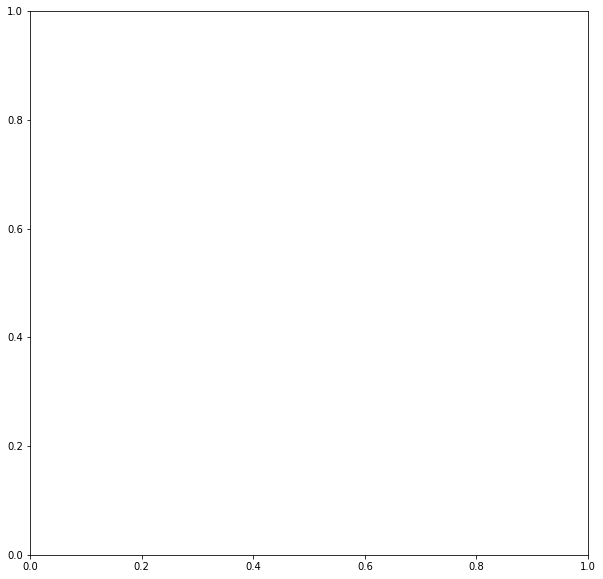

In [16]:
plt.figure(figsize=[10,10])
plt.plot(np.arange(num_iterations), losses, 'ro')
plt.plot(np.arange(num_iterations), train_accuracies, 'bo')
plt.plot(np.arange(num_iterations), validation_accuracies, 'go')
plt.title('Loss and Accuracy During Training Using Batch Gradient Descent')
plt.ylabel('Value')
plt.xlabel('Iteration Number')
plt.show()
print(accuracy(X_train_small, Y_train_small, theta))

In [ ]:
print(accuracy(X_val, Y_val, theta))

Doesn't look so good, huh? Now's lets see what we can do to improve that with regularization.
Note: We are using a relatively simple model, and so for this specific instance may not be very useful.

In [ ]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10]
norms = ['l1, 'l2'']

for norm in norms:
    print(norm)
    for lamb in lambdas:
        for i in range(num_iterations):
            pass
        print(lamb)
        print('Training: ' + train_acc + ', Validation: ' + val_acc)
        print()

To see what kind of effect regularization is having on the weights, train the model with varying norms and lambdas and print out the parameters.

In [ ]:
print(theta)